In [163]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [164]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [165]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [166]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [167]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine,reflect=True)

In [168]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [169]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [170]:
# Create a session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [171]:
# Find the most recent date in the data set.
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_data)

('2017-08-23',)


('2017-08-23',)
2016-08-23


<function matplotlib.pyplot.show(close=None, block=None)>

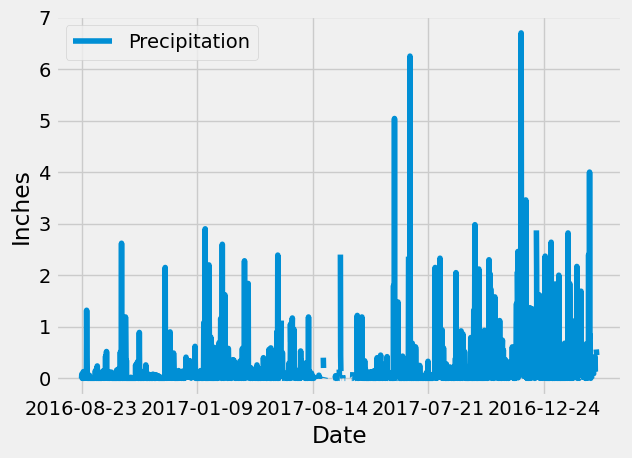

In [172]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_data)

# Calculate the date one year from the last date in data set.
x = dt.datetime.strptime(recent_data[0], '%Y-%m-%d')
querydate = dt.date(x.year-1,x.month,x.day)
print(querydate)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= recent_data[0]).\
        filter(Measurement.date >= querydate).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_data, columns = ["Date","Precipitation"])

# Sort the dataframe by date
year_df = df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot()
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel("Date")
plt.show

In [173]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [174]:
# Design a query to calculate the total number of stations in the dataset
calculation = session.query(Station.id).count()
calculation

9

In [175]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [176]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station[0][0]
selection = session.query(Measurement.tobs).filter(Measurement.station == active_station[0][0]).all()
info = session.query(func.min(Measurement.tobs)\
                     ,func.max(Measurement.tobs)\
                        ,func.avg(Measurement.tobs)).\
                            filter(Measurement.station == active_station[0][0]).all()
info


[(54.0, 85.0, 71.66378066378067)]

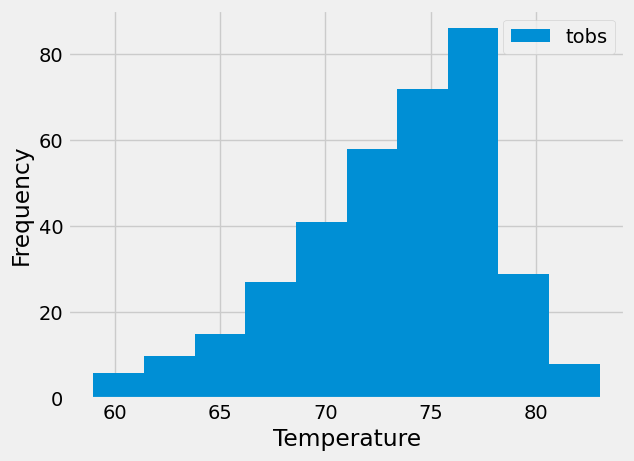

In [177]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
atempt = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date <= recent_data[0]).\
        filter(Measurement.date >= querydate).\
            filter(Measurement.station==active_station[0][0]).all()
a=pd.DataFrame(atempt)
fig = a.plot(kind = 'hist', xlabel='Temperature')
plt.show()

# Close Session

In [178]:
# Close Session
session.close()
